In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


df = pd.read_csv("csvs/titanicdata.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
df.drop(columns=["Name"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


## Graphs

<Axes: >

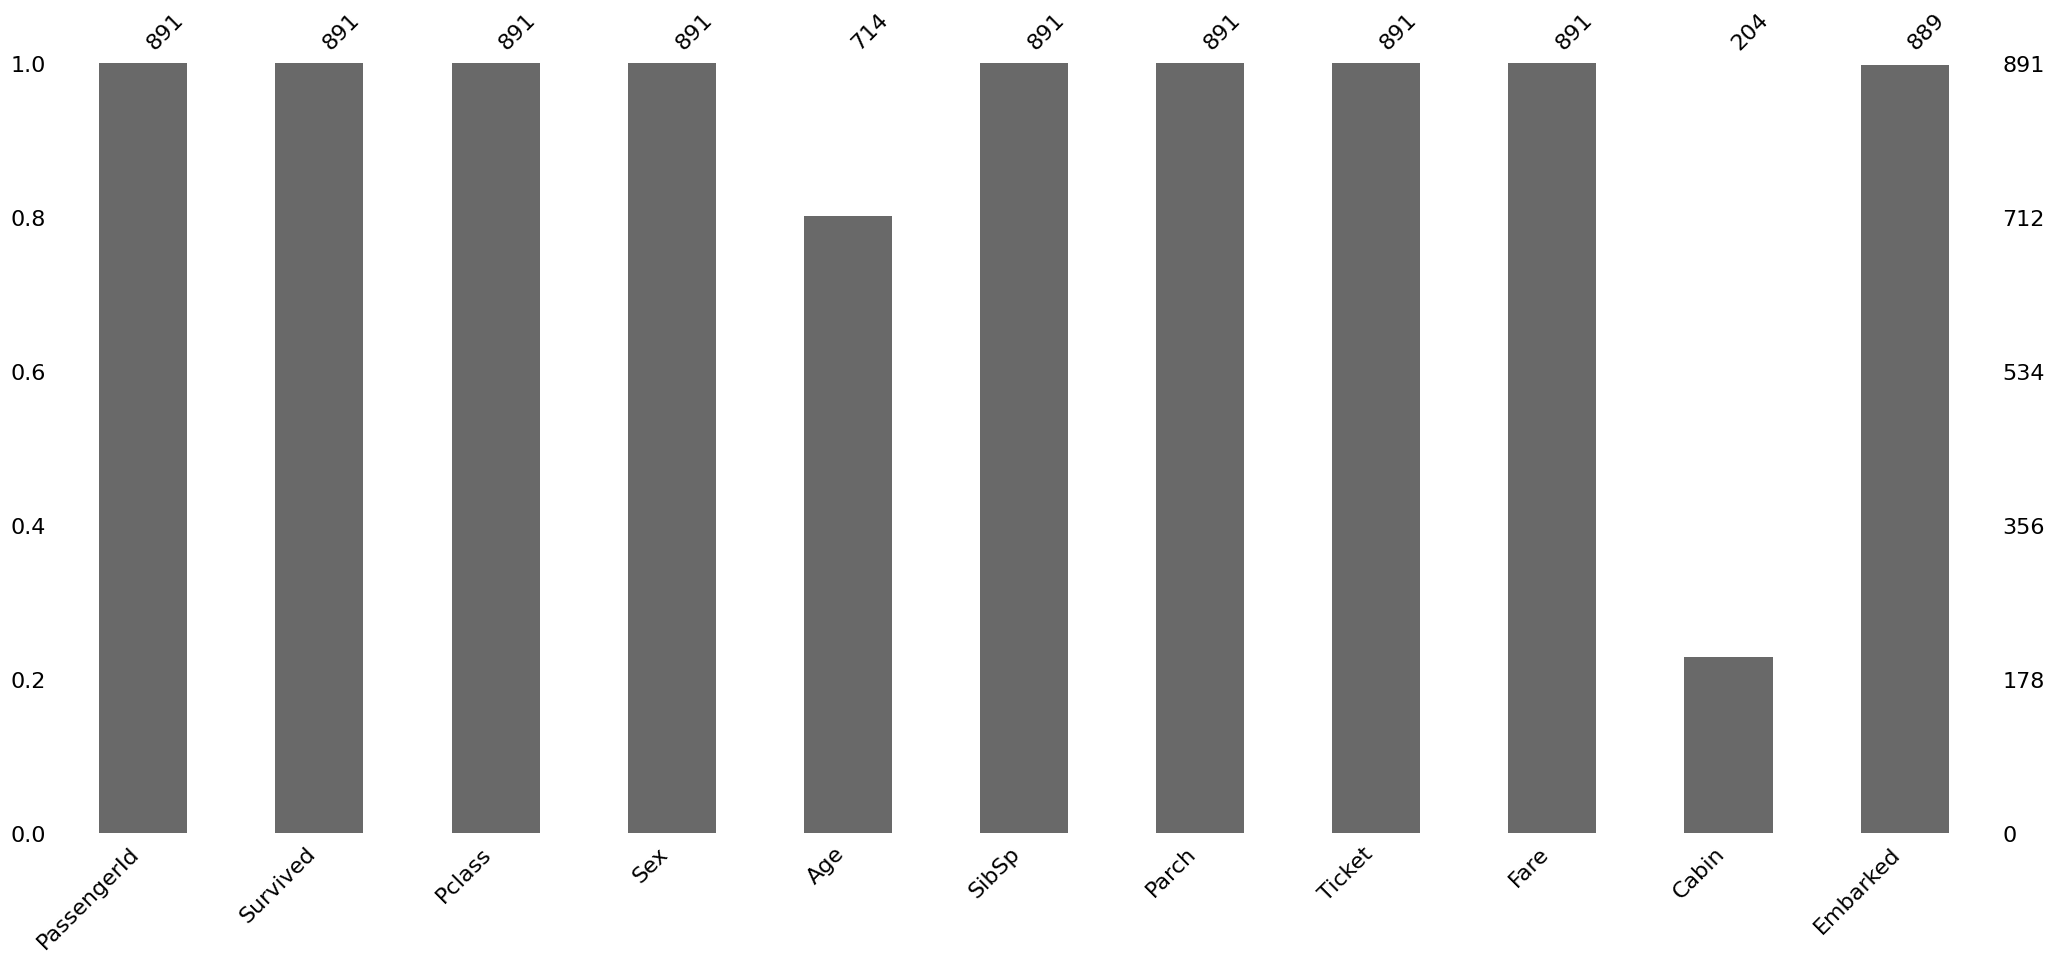

In [41]:
import missingno as msno

msno.bar(df)

<Axes: >

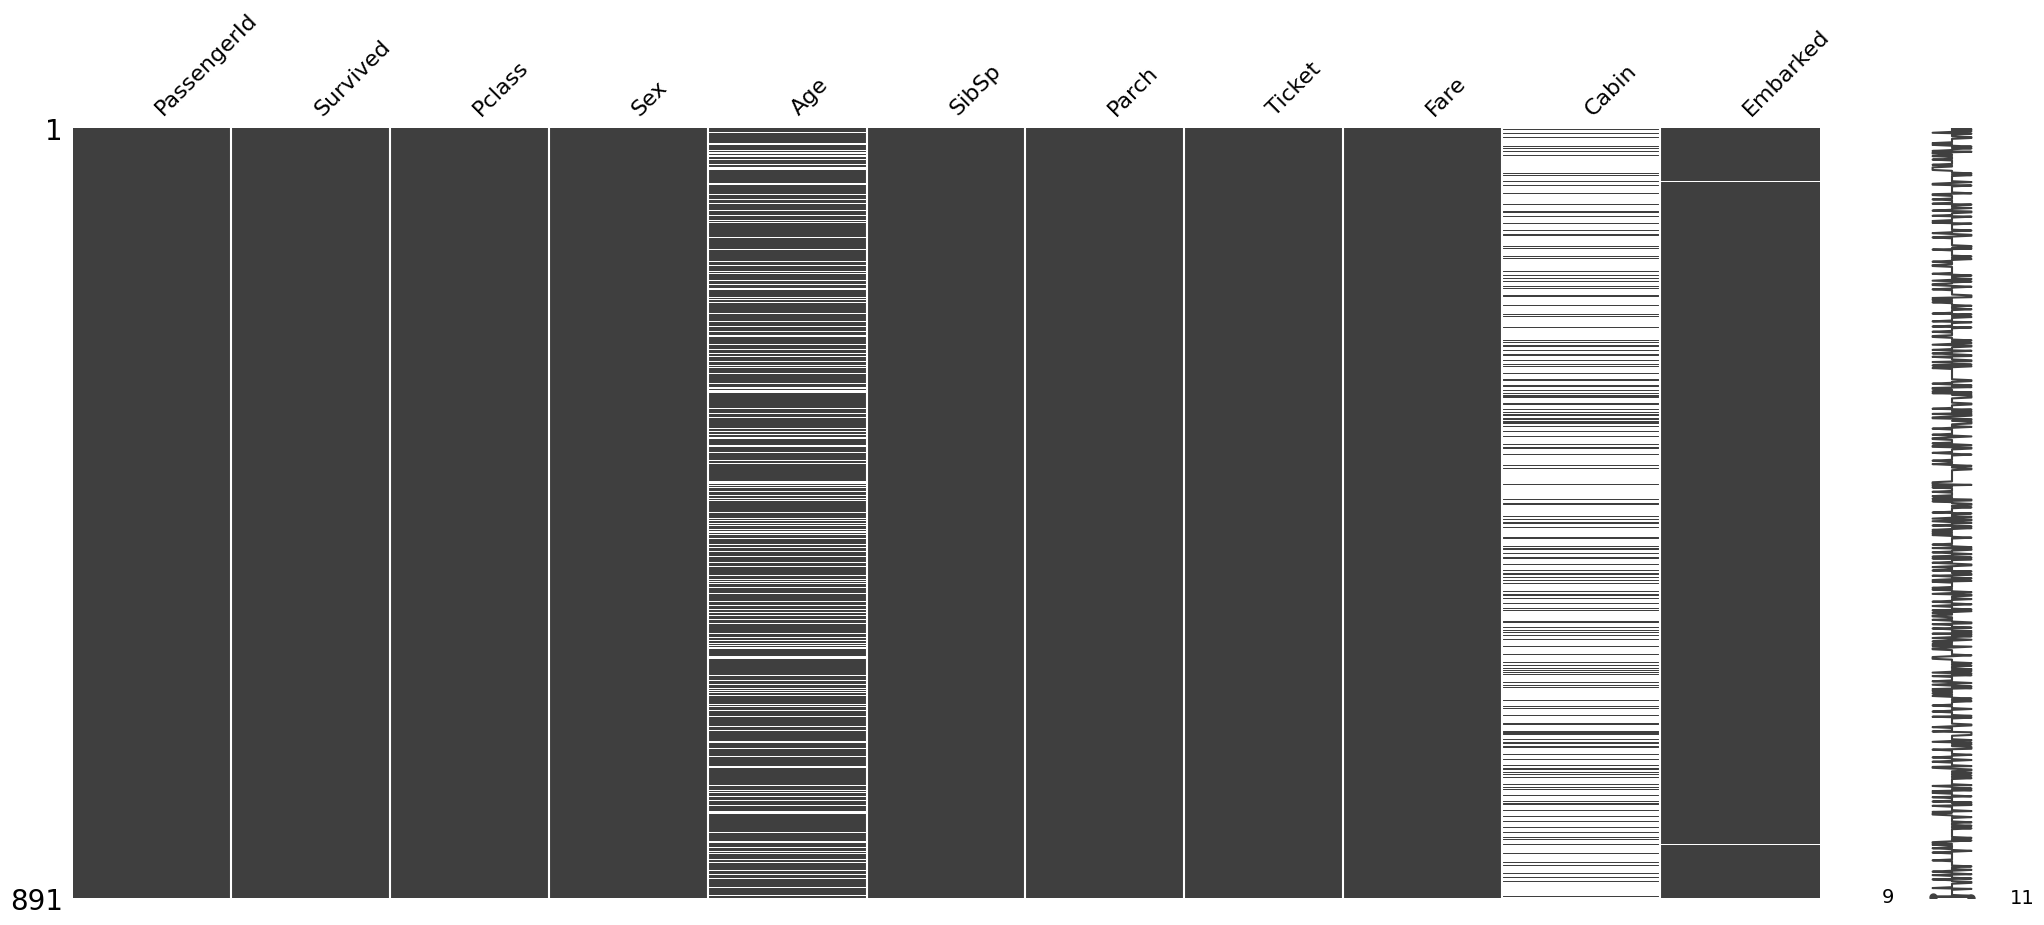

In [42]:
msno.matrix(df)

## Preprocessing

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for column in df.select_dtypes(include=["object"]).columns:
    df[column] = le.fit_transform(df[column])

df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,523,7.2500,147,2
1,2,1,1,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,0,26.0,0,0,669,7.9250,147,2
3,4,1,1,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,1,35.0,0,0,472,8.0500,147,2


## Imputing

In [81]:
from sklearn.impute import SimpleImputer
from reparo import CDI, FRNNI, HotDeckImputation, KNNImputer, PMM, SICE, MICE

from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

y = df["Survived"]
X = df.drop(columns=["Survived"])

models = [LogisticRegression(), GaussianProcessClassifier(), DecisionTreeClassifier(), RandomForestClassifier()]

imputers = [SimpleImputer(strategy="mean"),SimpleImputer(strategy="median"), SimpleImputer(strategy="most_frequent"), SimpleImputer(strategy="constant", fill_value=0), 
            CDI(), FRNNI(), HotDeckImputation(), KNNImputer(), PMM(), SICE(), MICE()]

columns = ["Imputation algorithm", "Prediction algorithm", "Accuracy"]

table = pd.DataFrame(columns=columns)

for i, imputer in enumerate(imputers):
    if i>=4:
        X_imputed = X.copy()
        imputer.apply(X_imputed, X.columns)
    else:
        X_imputed = imputer.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, random_state=42)
    
    for model in models:
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)

        table = pd.concat([table, pd.DataFrame([[imputer, model, acc]], columns=columns)])

In [83]:
table.sort_values(["Accuracy"], ascending=False)

,Imputation algorithm,Prediction algorithm,Accuracy
0,PMM(),"(DecisionTreeClassifier(max_features='sqrt', r...",0.843049
0,SimpleImputer(),"(DecisionTreeClassifier(max_features='sqrt', r...",0.838565
0,HotDeckImputation(),"(DecisionTreeClassifier(max_features='sqrt', r...",0.838565
0,KNNImputer(),"(DecisionTreeClassifier(max_features='sqrt', r...",0.834081
0,MICE(),"(DecisionTreeClassifier(max_features='sqrt', r...",0.834081
0,SICE(),"(DecisionTreeClassifier(max_features='sqrt', r...",0.834081
0,CDI(),"(DecisionTreeClassifier(max_features='sqrt', r...",0.829596
0,FRNNI(),"(DecisionTreeClassifier(max_features='sqrt', r...",0.829596
0,SimpleImputer(strategy='most_frequent'),"(DecisionTreeClassifier(max_features='sqrt', r...",0.829596
0,"SimpleImputer(fill_value=0, strategy='constant')","(DecisionTreeClassifier(max_features='sqrt', r...",0.825112
